In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Check for all available physical devices using TensorFlow
for device in tf.config.list_physical_devices():
    print( device.name)



/physical_device:CPU:0


In [39]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 50

In [40]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [41]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


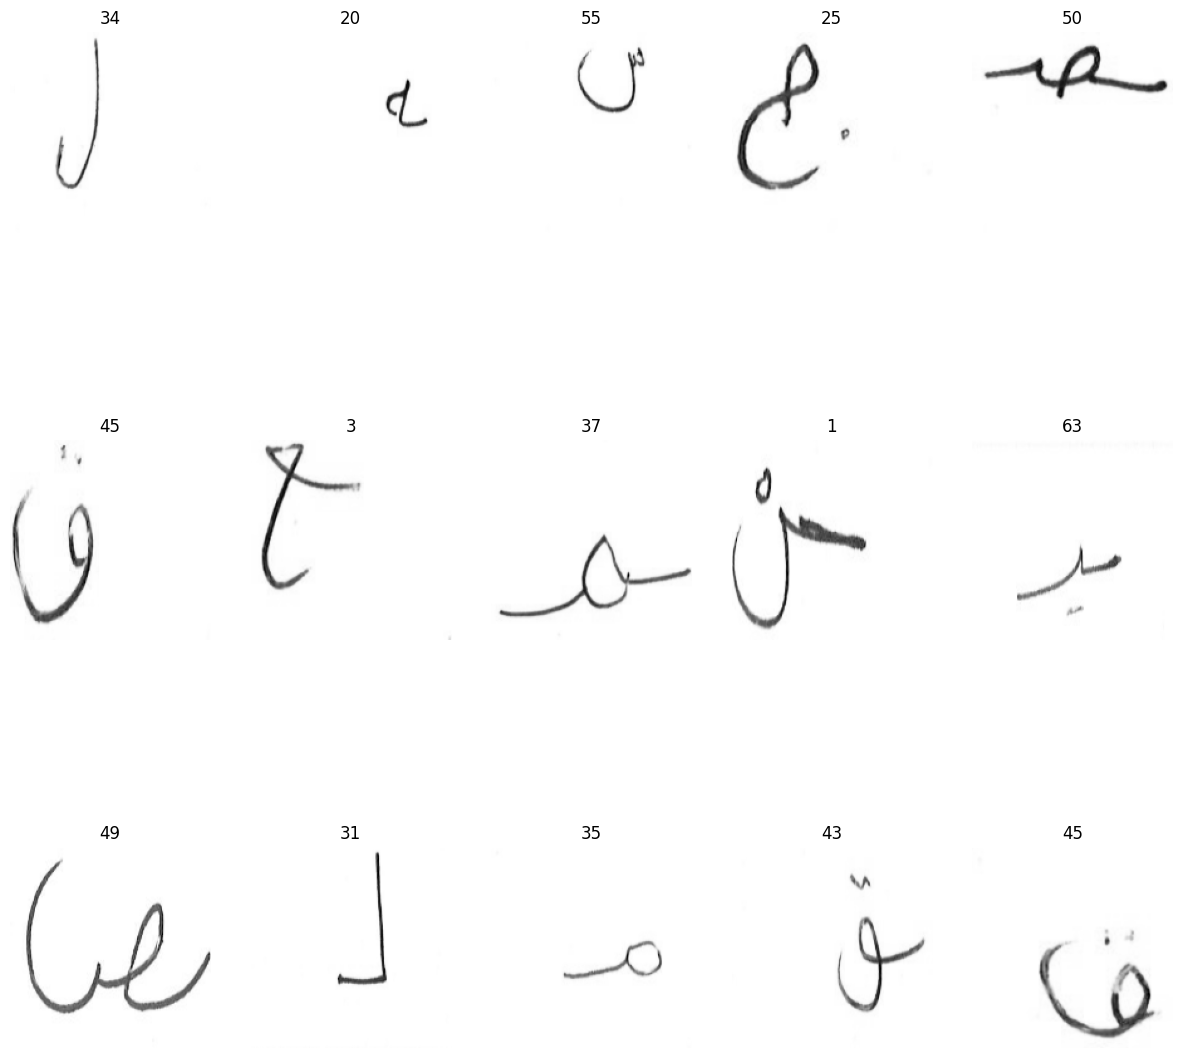

In [42]:
class_names = train_images.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_images.take(1): 
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [23]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(512, 160, 160, 1)
(512, 65)


In [43]:
model = tf.keras.Sequential([
    # Rescale pixel values to the range [0, 1]
    tf.keras.layers.Rescaling(1./255),
    
    # Data augmentation: Random rotation
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    
    # Data augmentation: Random zoom
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    
    # Convolutional layers with max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the output for dense layers
    tf.keras.layers.Flatten(),
    
    # Dense layers with relu activation and dropout for regularization
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Output layer with softmax activation (assuming a classification task)
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

In [44]:
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (512, 160, 160, 1)        0         
                                                                 
 random_rotation_4 (RandomR  (512, 160, 160, 1)        0         
 otation)                                                        
                                                                 
 random_zoom_4 (RandomZoom)  (512, 160, 160, 1)        0         
                                                                 
 conv2d_20 (Conv2D)          (512, 160, 160, 32)       320       
                                                                 
 max_pooling2d_20 (MaxPooli  (512, 80, 80, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (512, 80, 80, 64)        

In [45]:
learning_rate = 0.001

# Exponential decay learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

# Compile the model with the specified optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=EPOCHS)

Epoch 1/50
67/67 [==============================] - 29s 366ms/step - loss: 4.1752 - accuracy: 0.0150 - val_loss: 4.1685 - val_accuracy: 0.0213
Epoch 2/50
67/67 [==============================] - 26s 363ms/step - loss: 3.8465 - accuracy: 0.0729 - val_loss: 2.8456 - val_accuracy: 0.2424
Epoch 3/50
67/67 [==============================] - 26s 363ms/step - loss: 2.8780 - accuracy: 0.2411 - val_loss: 2.5210 - val_accuracy: 0.3118
Epoch 4/50
67/67 [==============================] - 26s 363ms/step - loss: 1.8749 - accuracy: 0.4606 - val_loss: 1.1226 - val_accuracy: 0.6562
Epoch 5/50
67/67 [==============================] - 26s 366ms/step - loss: 1.3408 - accuracy: 0.5959 - val_loss: 0.8489 - val_accuracy: 0.7308
Epoch 6/50
67/67 [==============================] - 27s 366ms/step - loss: 1.1033 - accuracy: 0.6582 - val_loss: 0.7295 - val_accuracy: 0.7708
Epoch 7/50
67/67 [==============================] - 27s 378ms/step - loss: 0.9222 - accuracy: 0.7148 - val_loss: 0.6430 - val_accuracy: 0.7965

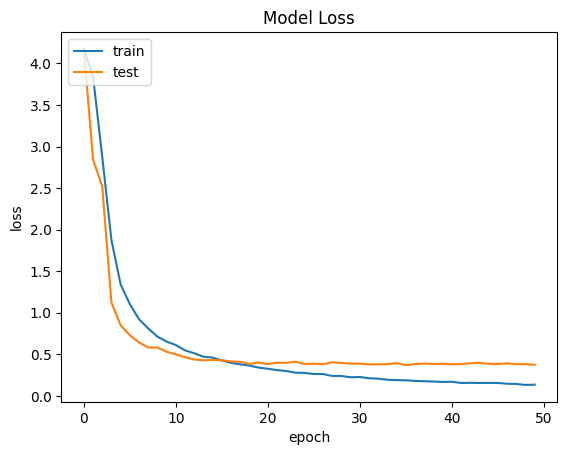

In [47]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

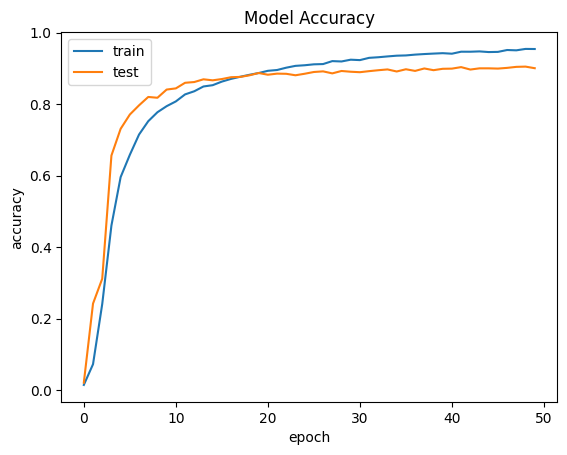

In [48]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
model.save('NN_320210321.keras')


In [50]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


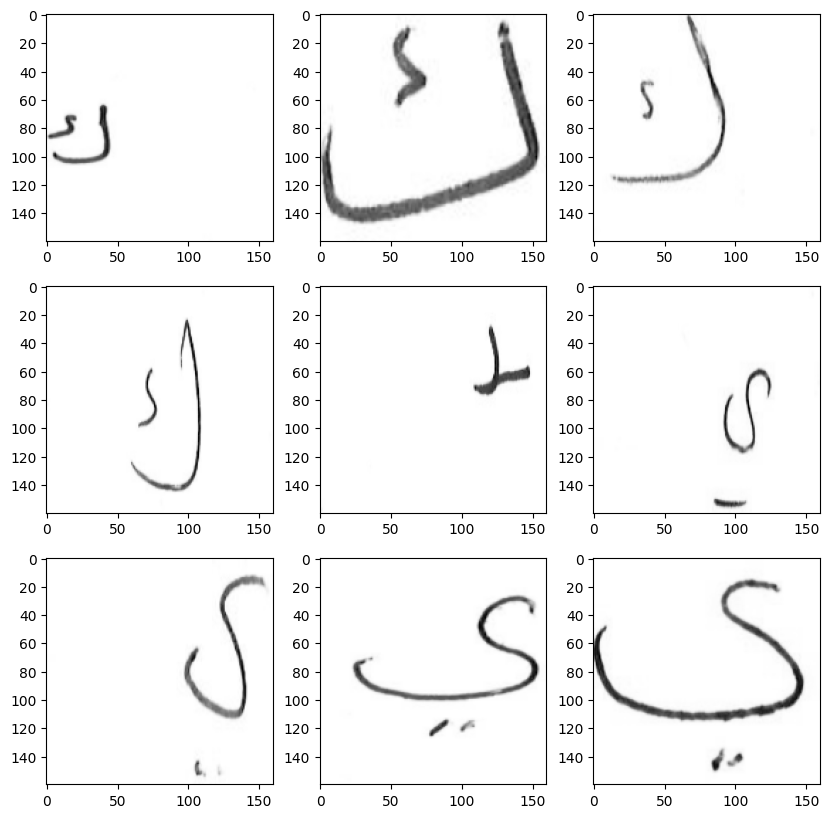

In [51]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [52]:
for images in test_images:
    print(images.shape)
    break

(512, 160, 160, 1)


In [53]:
predictions = model.predict(test_images)


21/21 [==============================] - 15s 738ms/step


In [77]:
img_list = os.listdir(datasets[1])


In [74]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [57]:
predictions.shape

(10640, 65)

In [58]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [59]:
print(predictions_mod)

[22 22 22 ... 61 61 61]


In [60]:
df_predictions.head()

,ID,Label
0,0,29
0,1,29
0,10,29
0,100,29
0,1000,13


In [61]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,29
1,1,29
2,10,29
3,100,29
4,1000,13
...,...,...
10635,9995,64
10636,9996,64
10637,9997,64
10638,9998,64


In [62]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have a model and test data
# model = ...  # Your trained model
# test_data = ...  # Your test data

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions and true labels to class indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(true_labels, axis=1)  # Assuming you have true labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'test_data' is not defined